VISUALIZATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib


In [2]:
df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_23988\247879204.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset


age  gender ethnicity education_level  income_level employment_status  \
0       18    Male     White    Postgraduate        Middle           Retired   
1       18  Female     White       No formal        Middle          Employed   
2       18  Female     White    Postgraduate  Lower-Middle          Employed   
3       18  Female     White    Postgraduate        Middle           Retired   
4       18    Male     White    Postgraduate        Middle          Employed   
...    ...     ...       ...             ...           ...               ...   
99995   90    Male  Hispanic        Graduate  Lower-Middle        Unemployed   
99996   90    Male     Black        Graduate  Lower-Middle           Student   
99997   90  Female     Black      Highschool           Low        Unemployed   
99998   90    Male     Black      Highschool  Upper-Middle        Unemployed   
99999   90  Female     Asian      Highschool  Lower-Middle          Employed   

      smoking_status  alcohol_consumption_per_week  \
0             Former                             2   
1            Current                             2   
2              Never                             1   
3              Never                             4   
4             Former                             0   
...              ...                           ...   
99995        Current                             4   
99996         Former                             1   
99997          Never                             0   
99998        Current                             2   
99999          Never                             1   

       physical_activity_minutes_per_week  diet_score  ...  ldl_cholesterol  \
0                                      13         6.7  ...              100   
1                                      88         5.5  ...               72   
2                                     163         5.2  ...               50   
3                                     108         7.2  ...               65   
4                                     115         7.8  ...              109   
...                                   ...         ...  ...              ...   
99995                                  84         3.1  ...              105   
99996                                  76         5.5  ...              118   
99997                                  91         3.3  ...              112   
99998                                 147         6.1  ...               94   
99999                                  76         5.1  ...               50   

       triglycerides  glucose_fasting  glucose_postprandial  insulin_level  \
0                145              121                   163          18.72   
1                 55              118                   166          17.16   
2                130              119                   199          10.33   
3                 87              101                   111          15.26   
4                 30               91                   138           2.00   
...              ...              ...                   ...            ...   
99995            101              119                   172          12.14   
99996             81              115                   180          16.54   
99997            142              137                   212           6.45   
99998            132              138                   160           6.20   
99999             94              122                   176           7.77   

       hba1c  diabetes_risk_score  diabetes_stage  diagnosed_diabetes  \
0       6.72                 24.2          Type 2                   1   
1       7.06                 16.9          Type 2                   1   
2       8.09                 37.2          Type 2                   1   
3       5.45                 33.7    Pre-Diabetes                   0   
4       6.01                 12.3    Pre-Diabetes                   0   
...      ...                  ...             ...                 ...   


In [3]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set Plotly renderer for Jupyter Notebook
pio.renderers.default = "notebook_connected"

# Load dataset
df = pd.read_csv(r'Process_data\diabetes_final_standardized.csv')

# Sample for performance
sample_df = df.sample(5000, random_state=42)


In [4]:
!pip install "plotly>=4.0" "nbformat>=4.2.0"



In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load dataset ---
df = pd.read_csv(r'Process_data\diabetes_final_standardized.csv')

# --- Sample for performance ---
sample_df = df.sample(5000, random_state=42)

# Ensure positive values for sizing
sample_df['diet_score_positive'] = sample_df['diet_score'].abs() + 1
sample_df['physical_activity_positive'] = sample_df['physical_activity_minutes_per_week'].abs() + 1

sns.set_style("whitegrid")


In [6]:
# 📊 This block generates an interactive grouped bar chart showing the distribution of BMI categories across gender groups.
# It first maps numeric gender codes to readable labels, reconstructs BMI categories from one-hot encoded columns,
# then aggregates counts by gender and BMI category. The final Plotly chart visualizes these counts,
# allowing easy comparison of obesity prevalence across gender groups with enhanced styling for clarity.

import pandas as pd
import plotly.express as px


# --- Map numeric gender codes to string labels if applicable ---
if sample_df['gender'].dtype.kind in 'iufc':  # numeric or categorical
    gender_map = {0: "Male", 1: "Female", 2: "Other"}
    sample_df['gender'] = sample_df['gender'].map(gender_map).fillna("Unknown")

# --- Create single BMI category column from one-hot encoding ---
def get_bmi_category(row):
    if row.get('bmi_category_Obese', 0) == 1:
        return 'Obese'
    elif row.get('bmi_category_Overweight', 0) == 1:
        return 'Overweight'
    elif row.get('bmi_category_Underweight', 0) == 1:
        return 'Underweight'
    else:
        return 'Normal'  # fallback if none is 1

sample_df['bmi_category'] = sample_df.apply(get_bmi_category, axis=1)

# --- Compute counts ---
counts = (
    sample_df
    .groupby(['gender', 'bmi_category'], dropna=False)
    .size()
    .reset_index(name='count')
)

if counts.empty:
    raise ValueError("No data found in sample_df after grouping. Check your input dataframe.")

# --- Create interactive grouped bar plot using Plotly ---
fig = px.bar(
    counts,
    x='gender',
    y='count',
    color='bmi_category',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Set2,
    text='count',
    title="Gender Distribution Across BMI Categories",
    labels={'gender': 'Gender', 'count': 'Count', 'bmi_category': 'BMI Category'},
    width=900,
    height=600
)

# --- Customize layout for aesthetics ---
fig.update_traces(textposition='outside', marker_line_color='black', marker_line_width=1)
fig.update_layout(
    title=dict(font=dict(size=18), x=0.5),
    legend_title=dict(font=dict(size=12)),
    legend=dict(font=dict(size=11)),
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    template='plotly_white'
)

fig.show()


In [7]:
# 📊 This block creates a stacked histogram to visualize how BMI categories are distributed across different age groups.
# It reconstructs the 'bmi_category' column from one-hot encoded flags, then uses Plotly to plot age on the x-axis
# and count on the y-axis, stacked by BMI category. This helps reveal age-related patterns in obesity prevalence,
# making it easier to identify which age ranges are more affected by each BMI group.



import plotly.express as px
import numpy as np

# --- Create 'bmi_category' column from one-hot encoded columns ---
sample_df['bmi_category'] = np.select(
    [
        sample_df.get('bmi_category_Obese', 0) == 1,
        sample_df.get('bmi_category_Overweight', 0) == 1,
        sample_df.get('bmi_category_Underweight', 0) == 1
    ],
    ['Obese', 'Overweight', 'Underweight'],
    default='Normal'
)

# --- Plotly stacked histogram ---
fig = px.histogram(
    sample_df,
    x='age',
    color='bmi_category',
    nbins=30,
    barmode='stack',
    opacity=0.7,
    color_discrete_sequence=px.colors.qualitative.Set2
)

# --- Customize layout ---
fig.update_layout(
    title="Age Distribution by BMI Category",
    xaxis_title="Age",
    yaxis_title="Count",
    template="plotly_white"
)

fig.show()


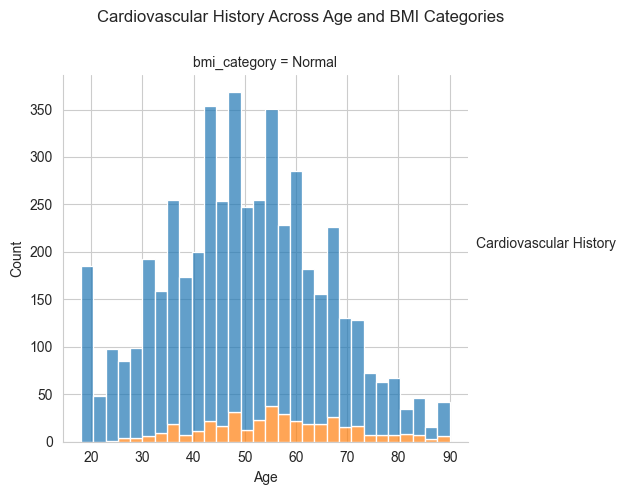

In [8]:

# 📊 This block creates a series of stacked histograms using Seaborn's FacetGrid to visualize how cardiovascular history varies across age groups,
# segmented by BMI category. Each subplot represents a BMI category (e.g., Normal, Overweight, Obese),
# showing the age distribution of individuals with and without cardiovascular history.
# This helps identify age-related cardiovascular patterns within each BMI group, supporting targeted health insights.
g = sns.FacetGrid(
    sample_df, 
    col='bmi_category', 
    height=5, 
    aspect=1
)
g.map_dataframe(
    sns.histplot, 
    x='age', 
    hue='cardiovascular_history', 
    bins=30, 
    multiple='stack', 
    alpha=0.7
)
g.set_axis_labels("Age", "Count")
g.add_legend(title="Cardiovascular History")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Cardiovascular History Across Age and BMI Categories")
plt.show()


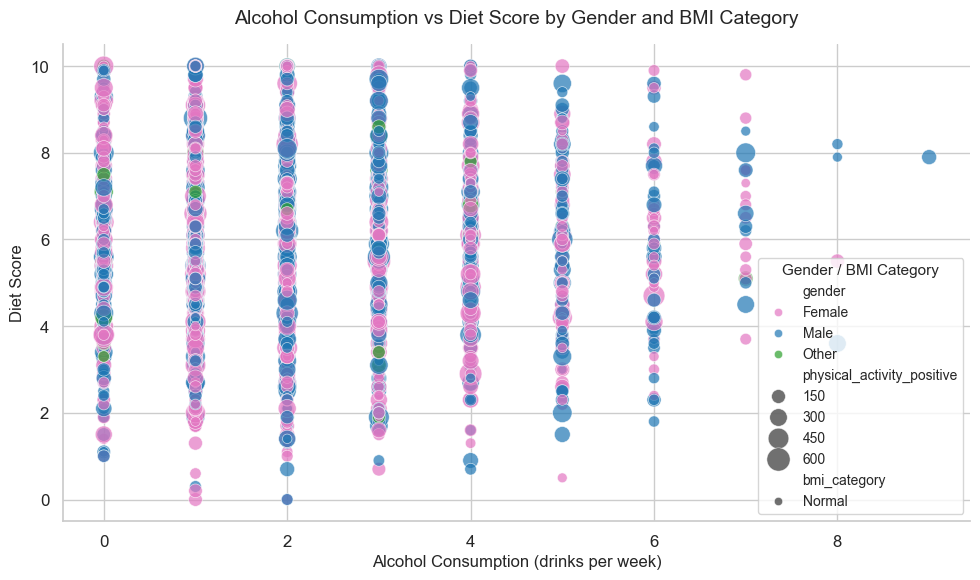

In [9]:
# 📊 This block creates a multi-dimensional scatter plot to explore the relationship between alcohol consumption and diet score,
# segmented by gender, BMI category, and physical activity level. Each point represents an individual, with bubble size indicating
# whether they meet physical activity guidelines. The plot uses color for gender, shape for BMI category, and size for activity,
# offering a rich visual summary of lifestyle patterns and their nutritional impact across demographic groups.



import seaborn as sns
import matplotlib.pyplot as plt

# Map numeric gender values to descriptive labels
sample_df["gender"] = sample_df["gender"].replace({
    0: "Male",
    1: "Female",
    2: "Other"
})

# Set modern Seaborn style
sns.set_theme(style="whitegrid", font_scale=1.1)

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=sample_df,
    x="alcohol_consumption_per_week",
    y="diet_score",
    hue="gender",
    style="bmi_category",
    size="physical_activity_positive",
    sizes=(40, 300),  # range for bubble sizes
    alpha=0.7,
    palette={"Male": "#1f77b4", "Female": "#e377c2", "Other": "#2ca02c"},
    edgecolor="w",
    linewidth=0.5
)

# Titles and labels
plt.title("Alcohol Consumption vs Diet Score by Gender and BMI Category", fontsize=14, pad=15)
plt.xlabel("Alcohol Consumption (drinks per week)", fontsize=12)
plt.ylabel("Diet Score", fontsize=12)

# Legend improvements
plt.legend(
    title="Gender / BMI Category",
    title_fontsize=11,
    fontsize=10,
    loc="best",
    frameon=True
)

# Light grid and spacing
sns.despine()
plt.tight_layout()
plt.show()


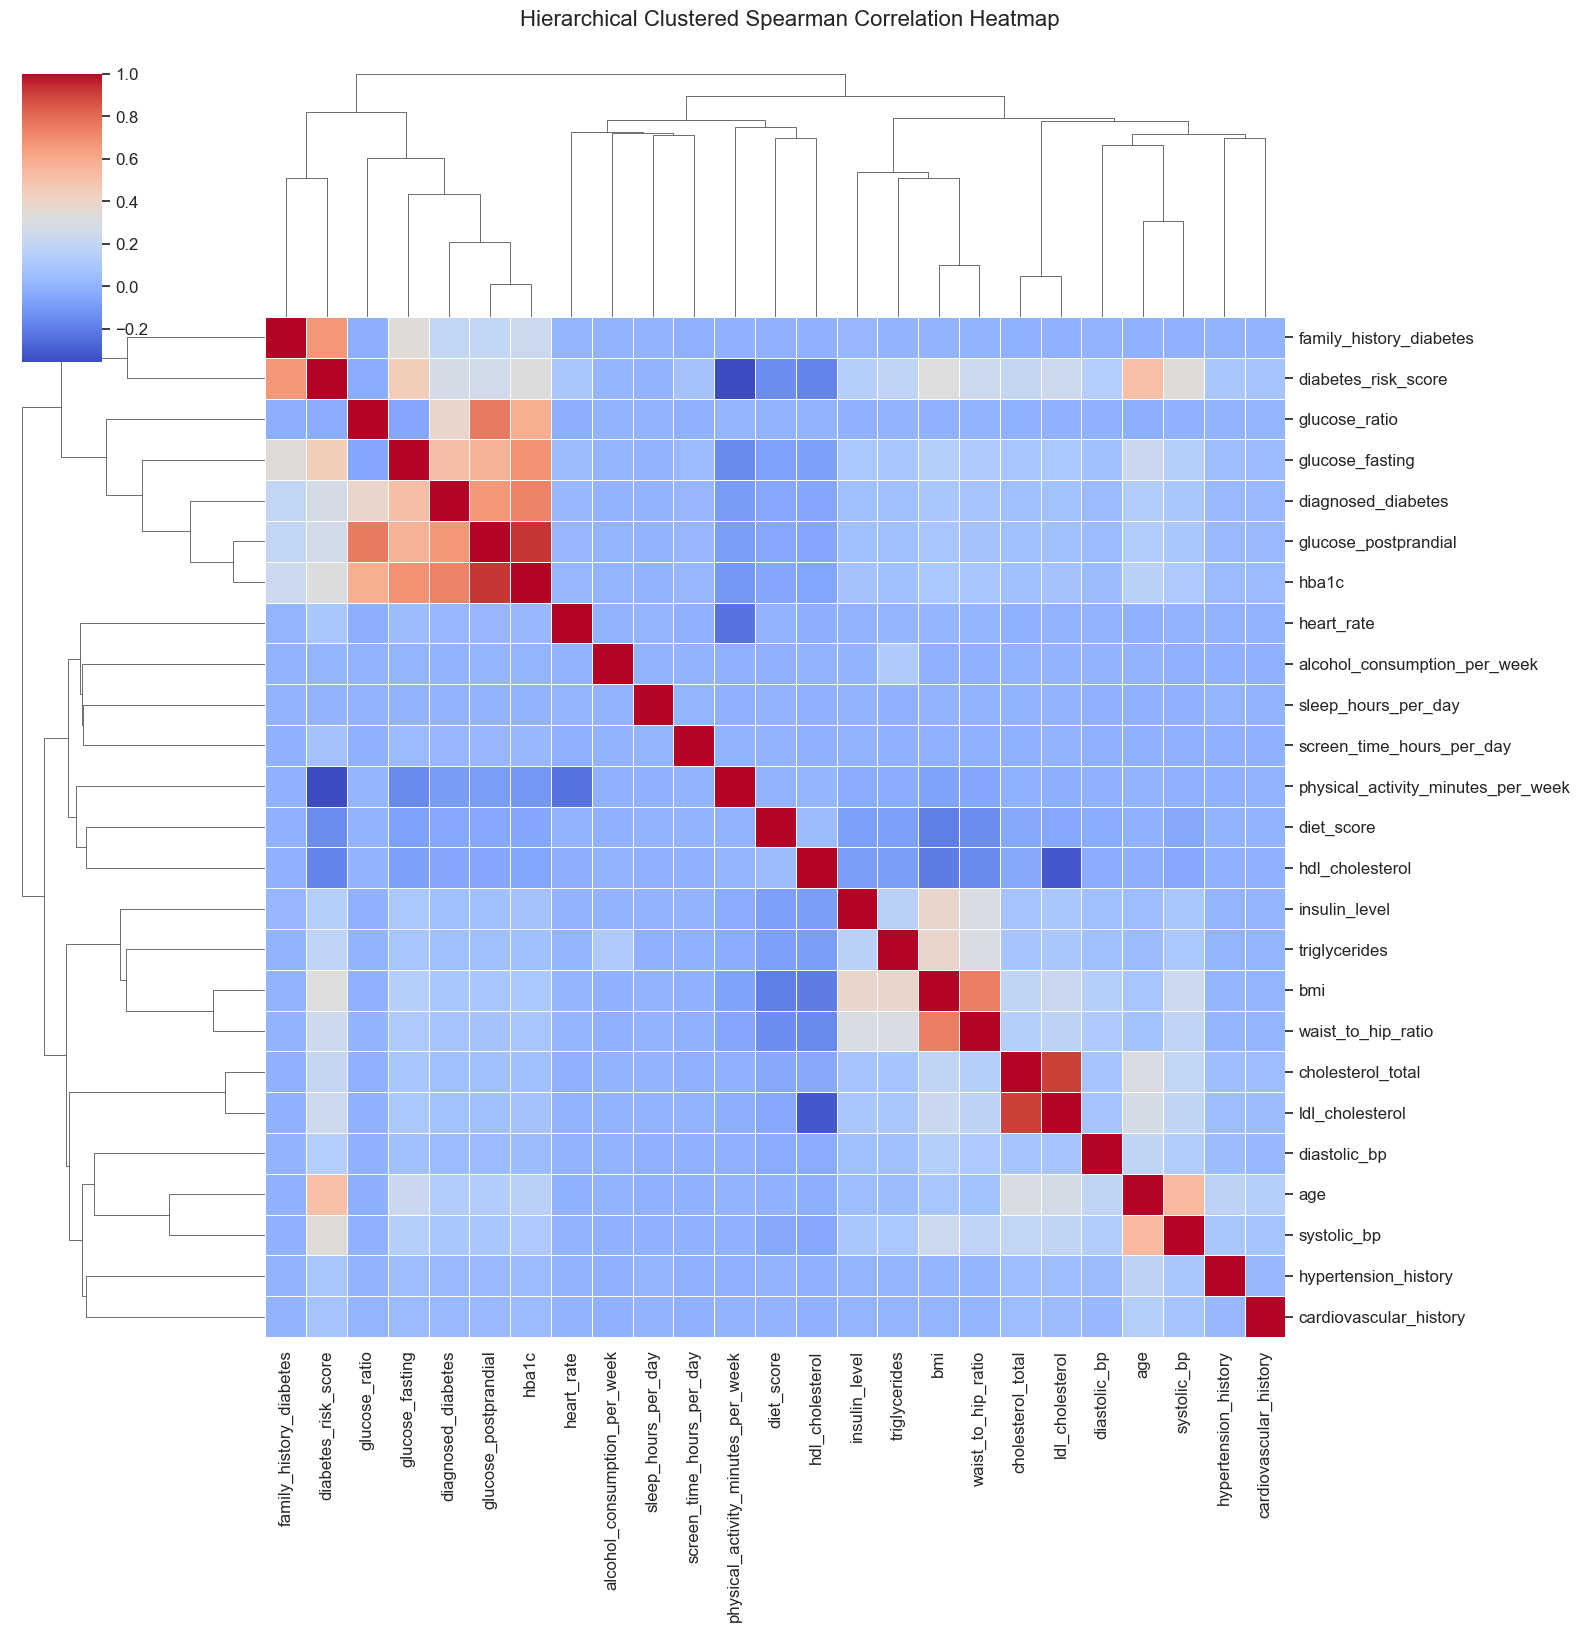

In [10]:
# 📊 This block generates a hierarchical clustered heatmap using Spearman correlation to explore relationships between numeric features.
# It selects only numeric columns from the dataset, computes pairwise Spearman correlations (ideal for monotonic relationships),
# and visualizes them with Seaborn's clustermap. The clustering groups similar features together,
# helping identify patterns, redundancies, or potential predictors for modeling health outcomes like BMI or diabetes risk.



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded the dataset
# df = pd.read_csv("your_dataset.csv")

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute Spearman correlation
corr = numeric_df.corr(method='spearman')

# Plot clustered heatmap
sns.clustermap(
    corr,
    cmap='coolwarm',
    figsize=(16, 16),
    linewidths=0.5
)

# Add title outside the clustermap (since clustermap creates its own figure)
plt.suptitle("Hierarchical Clustered Spearman Correlation Heatmap", y=1.02, fontsize=16)
plt.show()


In [11]:
df

age  gender ethnicity education_level  income_level employment_status  \
0       18    Male     White    Postgraduate        Middle           Retired   
1       18  Female     White       No formal        Middle          Employed   
2       18  Female     White    Postgraduate  Lower-Middle          Employed   
3       18  Female     White    Postgraduate        Middle           Retired   
4       18    Male     White    Postgraduate        Middle          Employed   
...    ...     ...       ...             ...           ...               ...   
99995   90    Male  Hispanic        Graduate  Lower-Middle        Unemployed   
99996   90    Male     Black        Graduate  Lower-Middle           Student   
99997   90  Female     Black      Highschool           Low        Unemployed   
99998   90    Male     Black      Highschool  Upper-Middle        Unemployed   
99999   90  Female     Asian      Highschool  Lower-Middle          Employed   

      smoking_status  alcohol_consumption_per_week  \
0             Former                             2   
1            Current                             2   
2              Never                             1   
3              Never                             4   
4             Former                             0   
...              ...                           ...   
99995        Current                             4   
99996         Former                             1   
99997          Never                             0   
99998        Current                             2   
99999          Never                             1   

       physical_activity_minutes_per_week  diet_score  ...  ldl_cholesterol  \
0                                      13         6.7  ...              100   
1                                      88         5.5  ...               72   
2                                     163         5.2  ...               50   
3                                     108         7.2  ...               65   
4                                     115         7.8  ...              109   
...                                   ...         ...  ...              ...   
99995                                  84         3.1  ...              105   
99996                                  76         5.5  ...              118   
99997                                  91         3.3  ...              112   
99998                                 147         6.1  ...               94   
99999                                  76         5.1  ...               50   

       triglycerides  glucose_fasting  glucose_postprandial  insulin_level  \
0                145              121                   163          18.72   
1                 55              118                   166          17.16   
2                130              119                   199          10.33   
3                 87              101                   111          15.26   
4                 30               91                   138           2.00   
...              ...              ...                   ...            ...   
99995            101              119                   172          12.14   
99996             81              115                   180          16.54   
99997            142              137                   212           6.45   
99998            132              138                   160           6.20   
99999             94              122                   176           7.77   

       hba1c  diabetes_risk_score  diabetes_stage  diagnosed_diabetes  \
0       6.72                 24.2          Type 2                   1   
1       7.06                 16.9          Type 2                   1   
2       8.09                 37.2          Type 2                   1   
3       5.45                 33.7    Pre-Diabetes                   0   
4       6.01                 12.3    Pre-Diabetes                   0   
...      ...                  ...             ...                 ...   


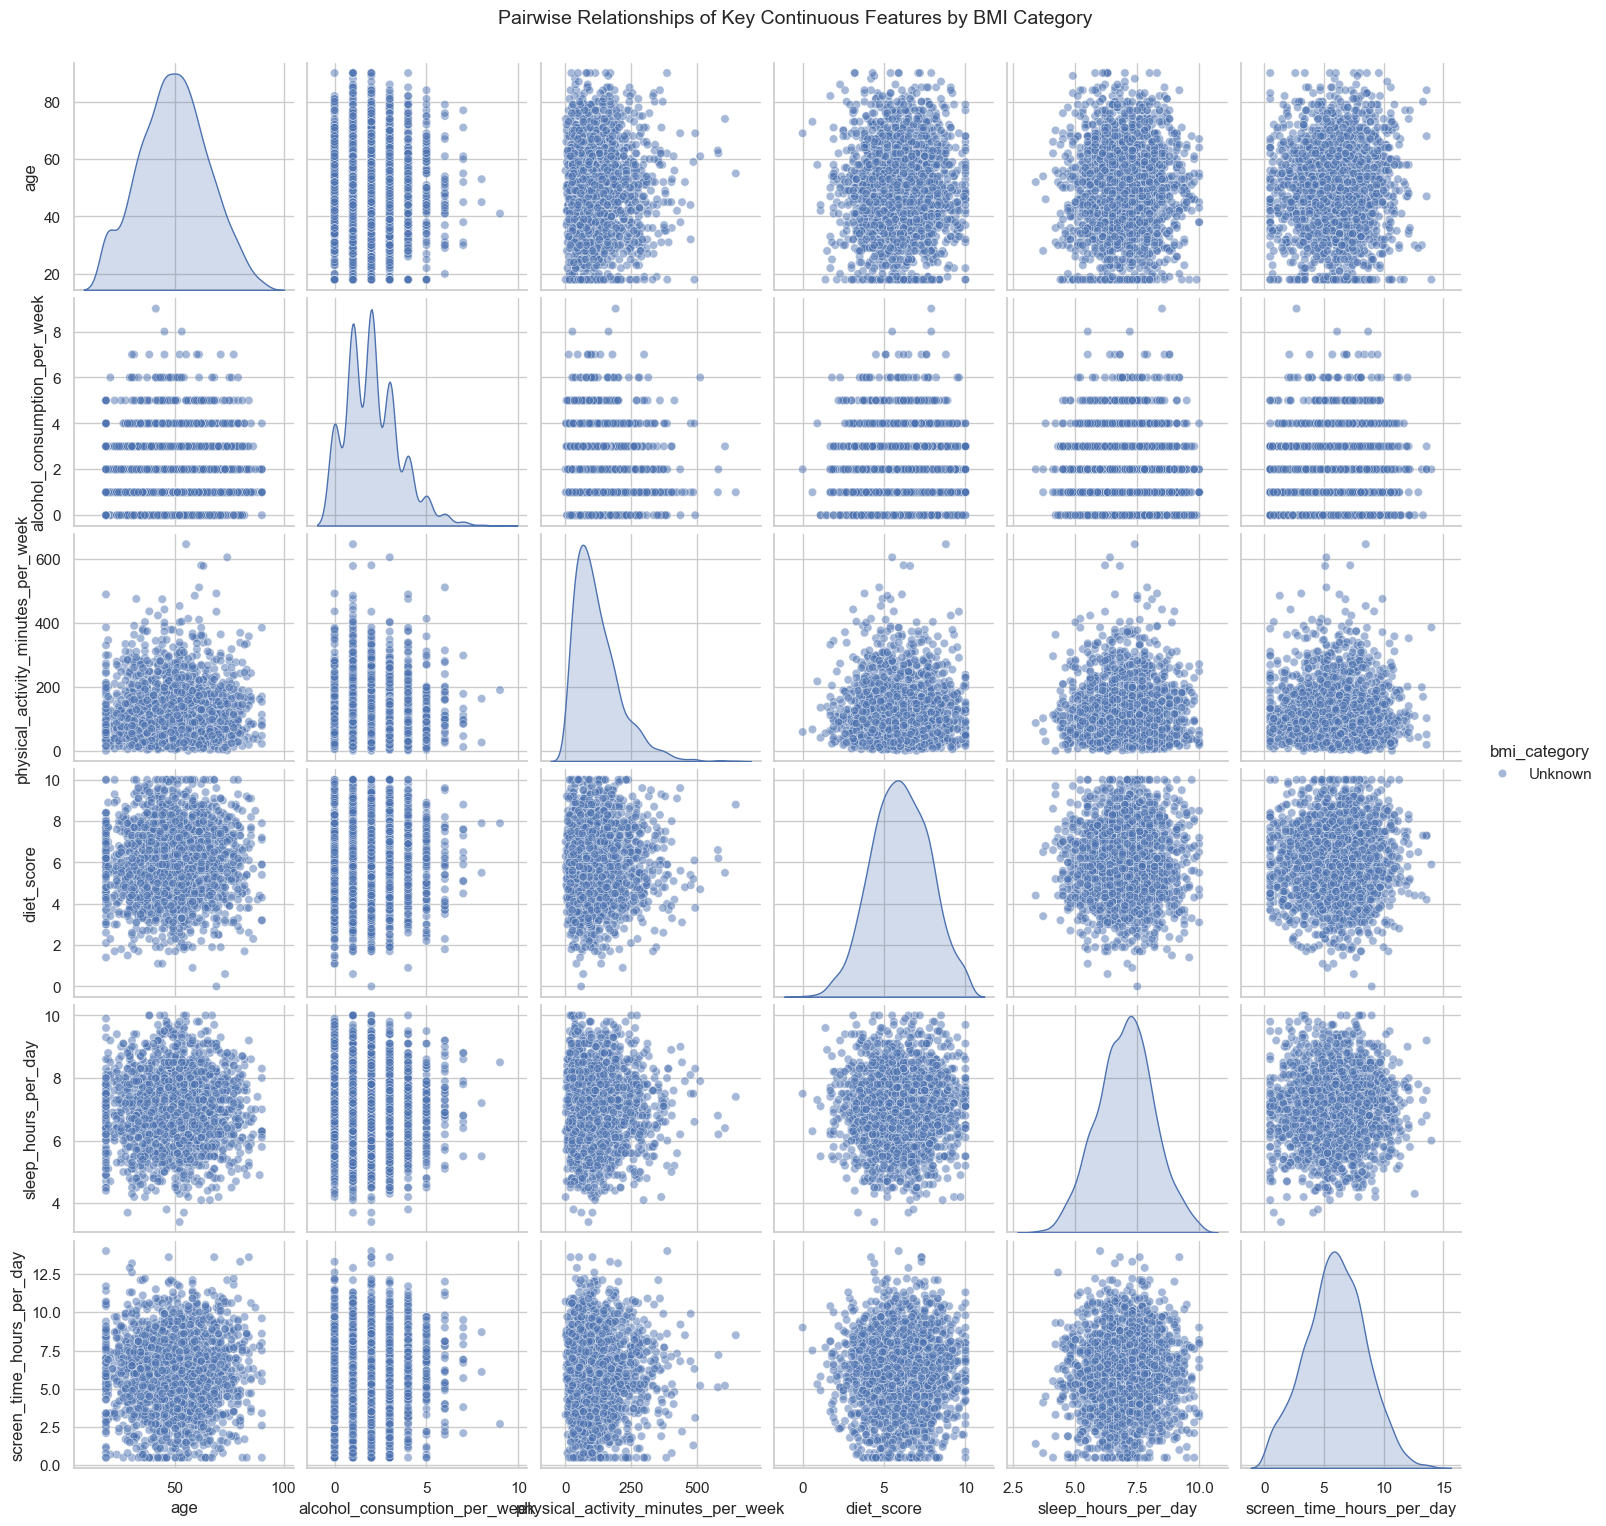

In [12]:
# 📊 This block generates a Seaborn pairplot to explore pairwise relationships among key continuous lifestyle and health features,
# segmented by BMI category. It reconstructs the BMI category from one-hot encoded columns, selects relevant continuous variables,
# and visualizes their distributions and interactions across BMI groups. The diagonal shows KDE plots for each feature,
# while the scatter plots reveal potential correlations and clustering patterns that may distinguish Normal, Overweight, and Obese individuals.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# 🔁 Load your dataset
# ===============================
# --- Load dataset ---
df = pd.read_csv(r'Process_data\diabetes_final_standardized.csv')

# ===============================
# 🔍 Sample for performance
# ===============================
sample_df = df.sample(n=2000, random_state=42)

# ===============================
# 1️⃣ Create a single BMI category column from one-hot
# ===============================
def get_bmi_category(row):
    if row.get('bmi_category_Obese', 0) == 1:
        return 'Obese'
    elif row.get('bmi_category_Overweight', 0) == 1:
        return 'Overweight'
    elif row.get('bmi_category_Underweight', 0) == 1:
        return 'Underweight'
    elif row.get('bmi_category_Normal', 0) == 1:
        return 'Normal'
    else:
        return 'Unknown'  # fallback if none is 1

sample_df['bmi_category'] = sample_df.apply(get_bmi_category, axis=1)

# ===============================
# 2️⃣ Select continuous features
# ===============================
continuous_features = [
    'age', 
    'alcohol_consumption_per_week', 
    'physical_activity_minutes_per_week', 
    'diet_score', 
    'sleep_hours_per_day', 
    'screen_time_hours_per_day'
]

# Drop rows with missing values in selected columns
sample_df = sample_df.dropna(subset=continuous_features + ['bmi_category'])

# ===============================
# 3️⃣ Pairplot by BMI category
# ===============================
sns.set(style="whitegrid")
pairplot = sns.pairplot(
    sample_df,
    vars=continuous_features,
    hue='bmi_category',
    plot_kws={'alpha': 0.5},
    diag_kind='kde',
    corner=False
)

pairplot.fig.suptitle(
    "Pairwise Relationships of Key Continuous Features by BMI Category", 
    y=1.02, fontsize=14
)
plt.show()


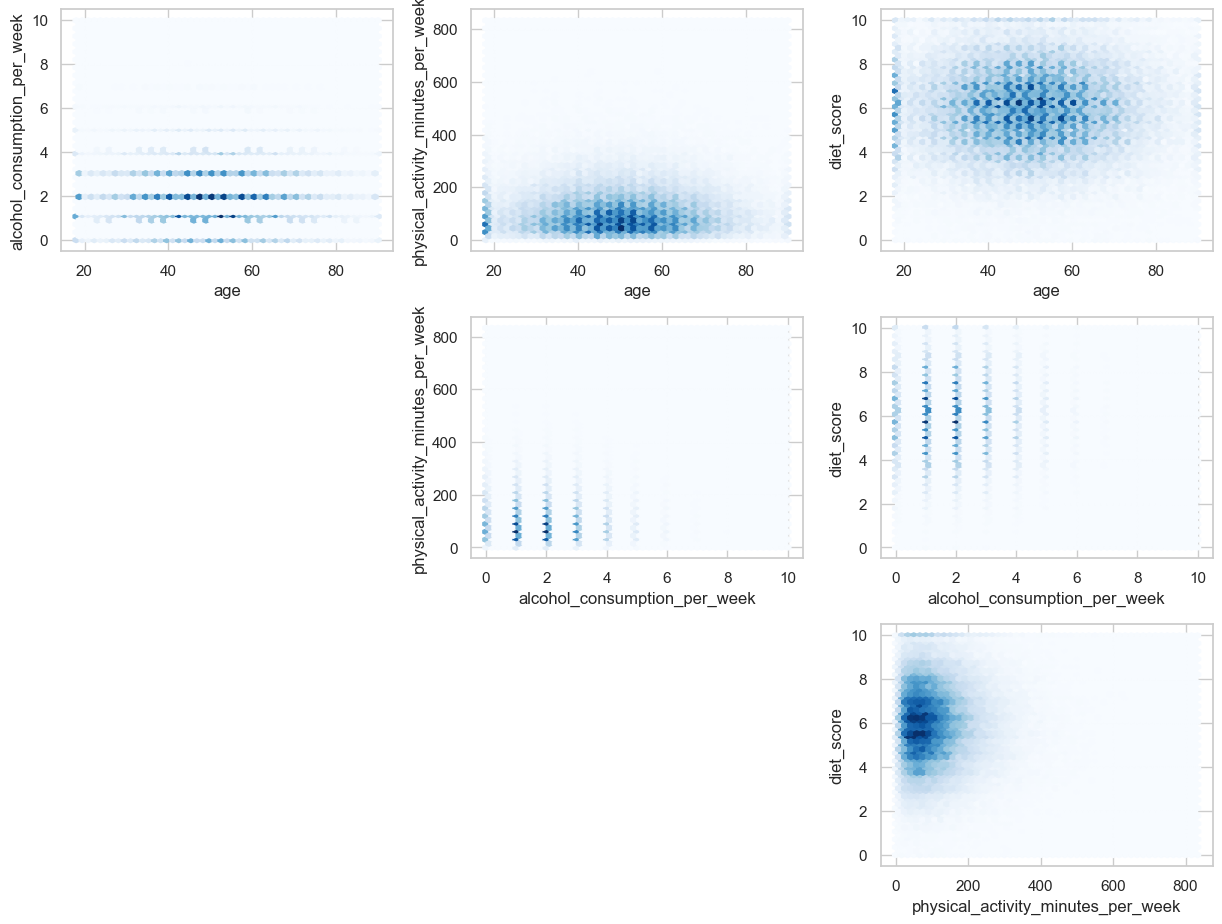

In [13]:
# 📊 This block generates hexbin plots to visualize pairwise relationships among key continuous health and lifestyle features.
# It loops through combinations of selected features (e.g., age, alcohol consumption, physical activity, diet score),
# and creates density-based scatter plots where color intensity reflects the concentration of data points.
# This helps reveal nonlinear patterns, clusters, and correlations that may not be obvious in standard scatter plots,
# offering deeper insight into behavioral and health interactions within the dataset.



continuous_features = [
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score'
]

import matplotlib.pyplot as plt

# Hexbin plots for pairwise relationships
plt.figure(figsize=(16,12))

for i, x_col in enumerate(continuous_features):
    for j, y_col in enumerate(continuous_features):
        if i < j:
            plt.subplot(len(continuous_features), len(continuous_features), i*len(continuous_features)+j+1)
            plt.hexbin(df[x_col], df[y_col], gridsize=50, cmap='Blues')
            plt.xlabel(x_col)
            plt.ylabel(y_col)
plt.tight_layout()
plt.show()


In [14]:
df

age  gender ethnicity education_level  income_level employment_status  \
0       18    Male     White    Postgraduate        Middle           Retired   
1       18  Female     White       No formal        Middle          Employed   
2       18  Female     White    Postgraduate  Lower-Middle          Employed   
3       18  Female     White    Postgraduate        Middle           Retired   
4       18    Male     White    Postgraduate        Middle          Employed   
...    ...     ...       ...             ...           ...               ...   
99995   90    Male  Hispanic        Graduate  Lower-Middle        Unemployed   
99996   90    Male     Black        Graduate  Lower-Middle           Student   
99997   90  Female     Black      Highschool           Low        Unemployed   
99998   90    Male     Black      Highschool  Upper-Middle        Unemployed   
99999   90  Female     Asian      Highschool  Lower-Middle          Employed   

      smoking_status  alcohol_consumption_per_week  \
0             Former                             2   
1            Current                             2   
2              Never                             1   
3              Never                             4   
4             Former                             0   
...              ...                           ...   
99995        Current                             4   
99996         Former                             1   
99997          Never                             0   
99998        Current                             2   
99999          Never                             1   

       physical_activity_minutes_per_week  diet_score  ...  ldl_cholesterol  \
0                                      13         6.7  ...              100   
1                                      88         5.5  ...               72   
2                                     163         5.2  ...               50   
3                                     108         7.2  ...               65   
4                                     115         7.8  ...              109   
...                                   ...         ...  ...              ...   
99995                                  84         3.1  ...              105   
99996                                  76         5.5  ...              118   
99997                                  91         3.3  ...              112   
99998                                 147         6.1  ...               94   
99999                                  76         5.1  ...               50   

       triglycerides  glucose_fasting  glucose_postprandial  insulin_level  \
0                145              121                   163          18.72   
1                 55              118                   166          17.16   
2                130              119                   199          10.33   
3                 87              101                   111          15.26   
4                 30               91                   138           2.00   
...              ...              ...                   ...            ...   
99995            101              119                   172          12.14   
99996             81              115                   180          16.54   
99997            142              137                   212           6.45   
99998            132              138                   160           6.20   
99999             94              122                   176           7.77   

       hba1c  diabetes_risk_score  diabetes_stage  diagnosed_diabetes  \
0       6.72                 24.2          Type 2                   1   
1       7.06                 16.9          Type 2                   1   
2       8.09                 37.2          Type 2                   1   
3       5.45                 33.7    Pre-Diabetes                   0   
4       6.01                 12.3    Pre-Diabetes                   0   
...      ...                  ...             ...                 ...   


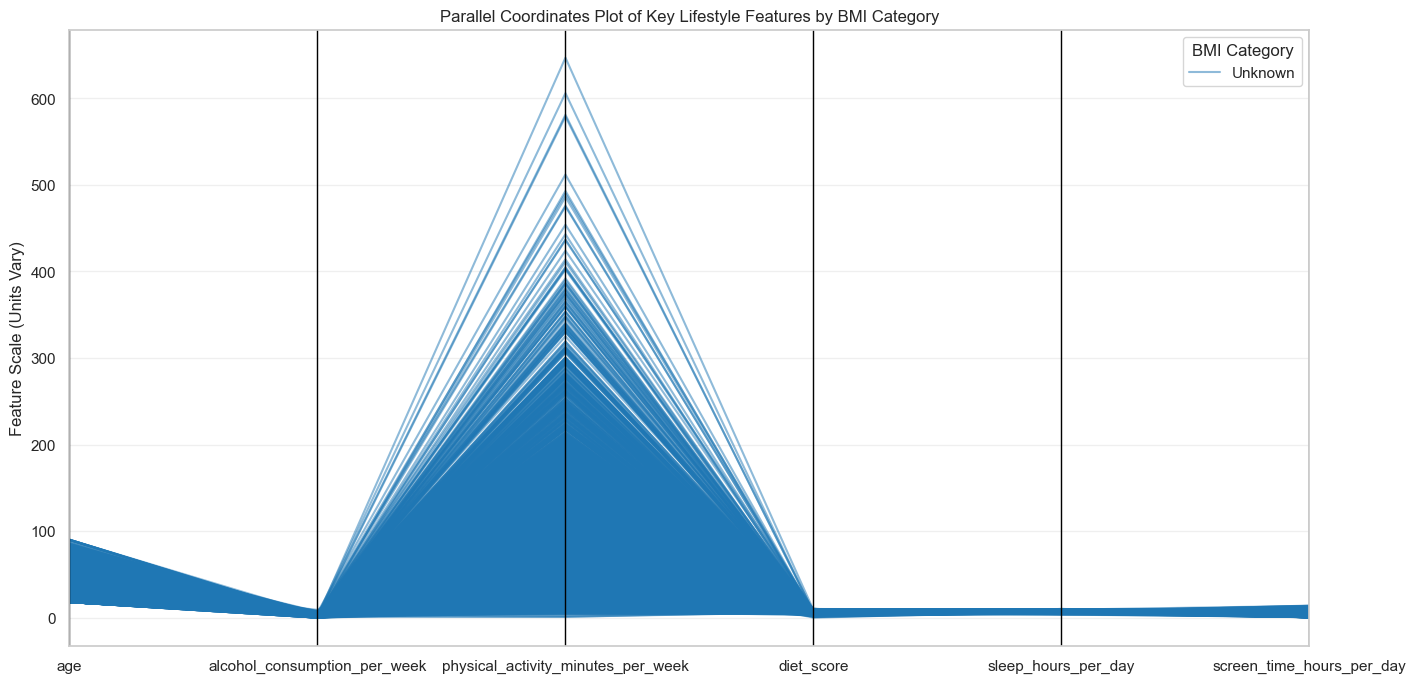

In [15]:
# 📊 Parallel Coordinates Plot of Lifestyle and Health Features by BMI Category

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# ✅ Reconstruct 'bmi_category' if one-hot encoded columns exist
if 'bmi_category' not in df.columns:
    def extract_bmi_category(row):
        if row.get('bmi_category_obese', 0) == 1:
            return 'Obese'
        elif row.get('bmi_category_overweight', 0) == 1:
            return 'Overweight'
        elif row.get('bmi_category_normal', 0) == 1:
            return 'Normal'
        else:
            return 'Unknown'
    df['bmi_category'] = df.apply(extract_bmi_category, axis=1)

# ✅ Sample for readability
sample_df = df.sample(n=2000, random_state=42)

# ✅ Select features (ensure sleep/screen time exist or simulate them)
for col in ['sleep_hours_per_day', 'screen_time_hours_per_day']:
    if col not in sample_df.columns:
        sample_df[col] = pd.Series(
            np.random.normal(loc=7 if 'sleep' in col else 4, scale=1.5, size=len(sample_df)),
            index=sample_df.index
        )

# ✅ Define feature list
features = [
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'screen_time_hours_per_day',
    'bmi_category'
]

# ✅ Drop rows with missing values in selected columns
sample_df = sample_df.dropna(subset=features)

# ✅ Plot
plt.figure(figsize=(16, 8))
parallel_coordinates(
    sample_df[features],
    class_column='bmi_category',
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Normal, Overweight, Obese
    alpha=0.5
)

plt.title("Parallel Coordinates Plot of Key Lifestyle Features by BMI Category")
plt.ylabel("Feature Scale (Units Vary)")
plt.grid(True, alpha=0.3)
plt.legend(title='BMI Category')
plt.show()


C:\Users\Legion\AppData\Local\Temp\ipykernel_23988\260556898.py:28: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



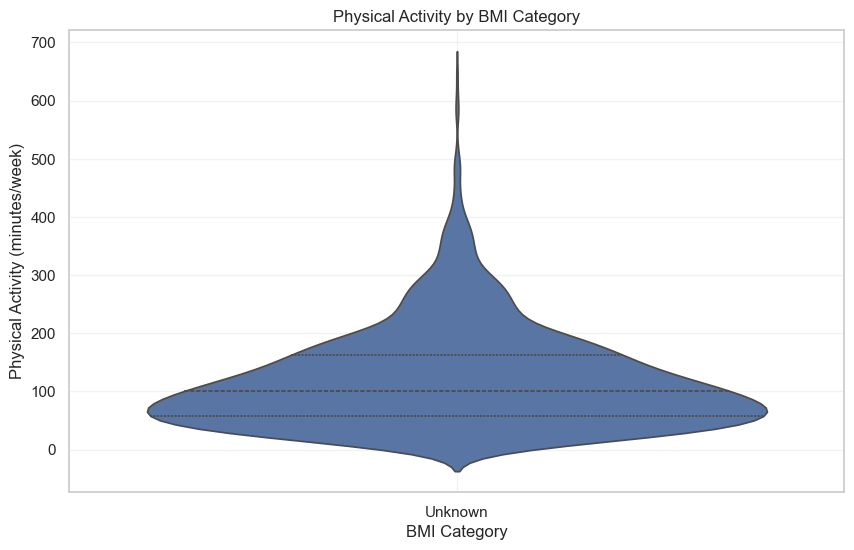

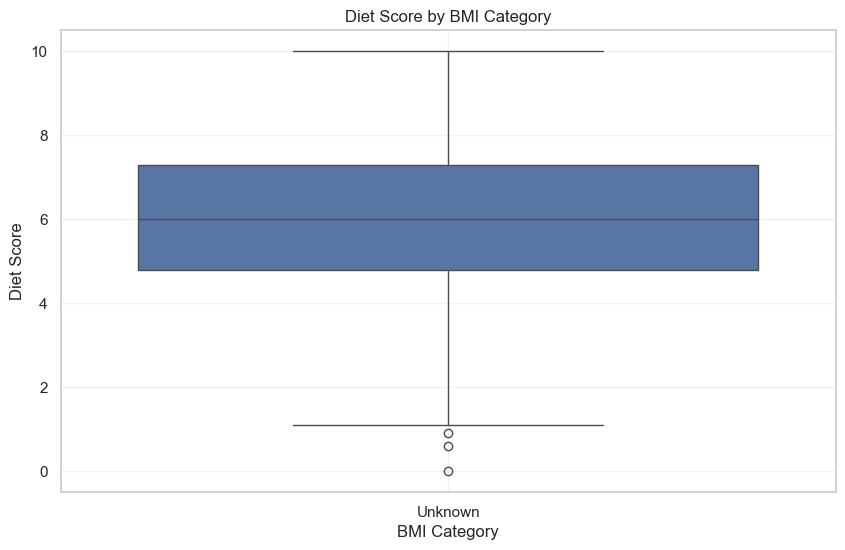

In [16]:
# 📊 This block generates two comparative plots to analyze how physical activity and diet score vary across BMI categories.
# The violin plot shows the distribution and density of weekly physical activity minutes, highlighting differences in spread and central tendency.
# The boxplot summarizes diet score distributions, revealing medians, quartiles, and potential outliers.
# Together, these visuals help identify behavioral patterns linked to BMI status, supporting targeted health interventions and lifestyle profiling.


import seaborn as sns
import matplotlib.pyplot as plt

# Sample for performance
sample_df = df.sample(n=2000, random_state=42)

# Use the real categorical column name
cat_col = 'bmi_category'

# Drop rows with missing values in the columns we'll plot
sample_df = sample_df.dropna(subset=[cat_col, 'physical_activity_minutes_per_week', 'diet_score'])

# If you expect standard categories, keep a sensible order but only the ones present
desired_order = ['Normal', 'Overweight', 'Obese']
order = [c for c in desired_order if c in sample_df[cat_col].unique()]
# If none of desired_order present, fall back to sorted unique values
if not order:
    order = sorted(sample_df[cat_col].unique())

# Violin plot: show distribution of physical activity by BMI category
plt.figure(figsize=(10, 6))
sns.violinplot(
    x=cat_col,
    y='physical_activity_minutes_per_week',
    data=sample_df,
    order=order,
    inner='quartile',   # shows median and quartiles
    scale='width'       # makes widths comparable
)
plt.xlabel('BMI Category')
plt.ylabel('Physical Activity (minutes/week)')
plt.title('Physical Activity by BMI Category')
plt.grid(alpha=0.25)
plt.show()

# Boxplot: diet score by BMI category
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=cat_col,
    y='diet_score',
    data=sample_df,
    order=order
)
plt.xlabel('BMI Category')
plt.ylabel('Diet Score')
plt.title('Diet Score by BMI Category')
plt.grid(alpha=0.25)
plt.show()


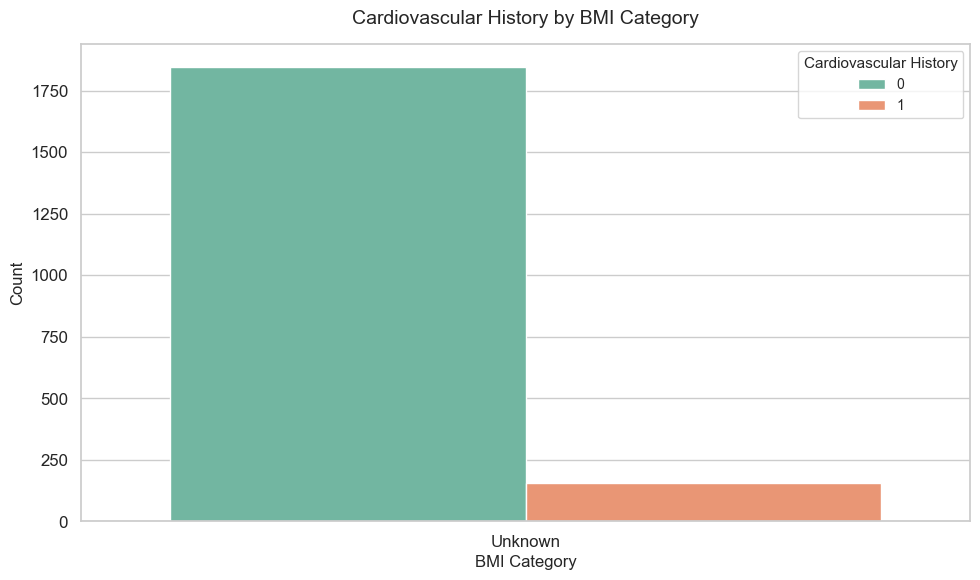

In [17]:
# 📊 This block generates a stacked bar chart to visualize the distribution of cardiovascular history across BMI categories.
# It samples the dataset for performance, ensures consistent BMI category ordering, and reshapes the data for plotting.
# Each bar shows the count of individuals with or without cardiovascular history within each BMI group,
# helping identify whether obesity correlates with increased cardiovascular risk in the population.



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample and drop missing values
sample_df = df.sample(n=2000, random_state=42).dropna(subset=['bmi_category', 'cardiovascular_history'])

# Define category order
desired_order = ['Normal', 'Overweight', 'Obese']
bmi_order = [c for c in desired_order if c in sample_df['bmi_category'].unique()]
if not bmi_order:
    bmi_order = sorted(sample_df['bmi_category'].unique())

# Create counts for stacked bar plotting
counts = pd.crosstab(sample_df['bmi_category'], sample_df['cardiovascular_history'])
counts = counts.reindex(bmi_order)  # ensure consistent order

# Reset index for seaborn compatibility
counts_reset = counts.reset_index().melt(id_vars='bmi_category', var_name='cardiovascular_history', value_name='count')

# Set Seaborn theme
sns.set_theme(style="whitegrid", font_scale=1.1)

# Create stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=counts_reset,
    x='bmi_category',
    y='count',
    hue='cardiovascular_history',
    palette='Set2'
)

# Add titles and labels
plt.title('Cardiovascular History by BMI Category', fontsize=14, pad=15)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Cardiovascular History', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


In [18]:
import seaborn as sns

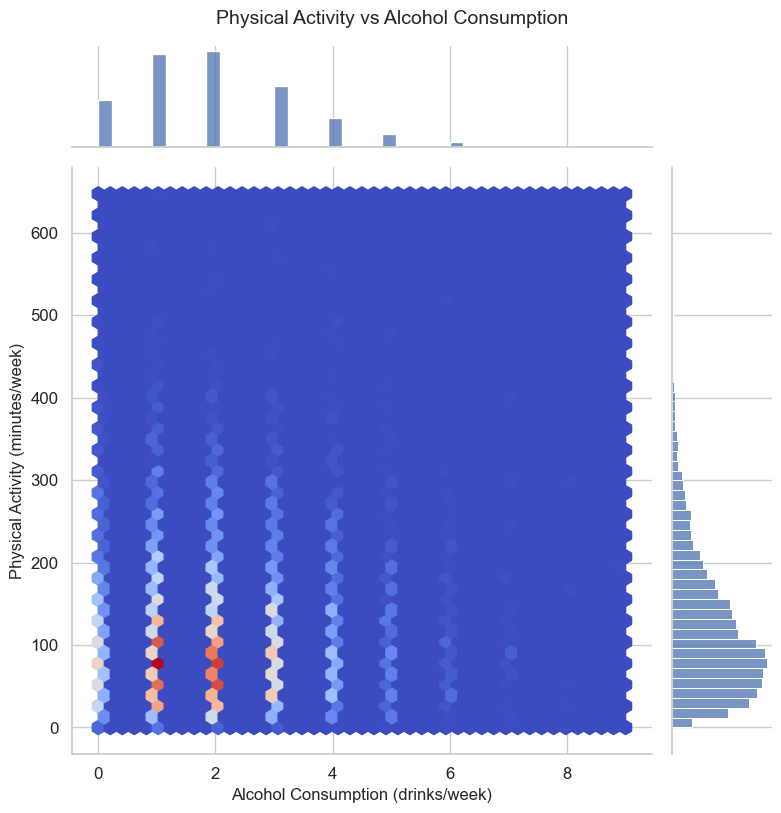

In [19]:
# 📊 This block creates a hexbin joint plot to visualize the relationship between alcohol consumption and physical activity levels.
# Each hexagon represents the density of individuals sharing similar values for weekly alcohol intake and physical activity minutes.
# The color intensity reflects concentration, helping uncover behavioral clusters and potential inverse or nonlinear trends
# between these two lifestyle factors in the diabetes dataset.



import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
# Sample for performance, adjust sample size if full_df has fewer than 5000 rows
full_df = pd.read_csv('Process_data/diabetes_final_standardized.csv')
sample_df = full_df.sample(min(5000, len(full_df)), random_state=42)

# Joint plot with hexbin style
sns.set_style("whitegrid")
g = sns.jointplot(
    x='alcohol_consumption_per_week',
    y='physical_activity_minutes_per_week',
    data=sample_df,
    kind='hex',       # hexbin style
    cmap='coolwarm',
    height=8          # figure size
)

g.set_axis_labels("Alcohol Consumption (drinks/week)", "Physical Activity (minutes/week)", fontsize=12)
plt.suptitle("Physical Activity vs Alcohol Consumption", y=1.02, fontsize=14)
plt.show()


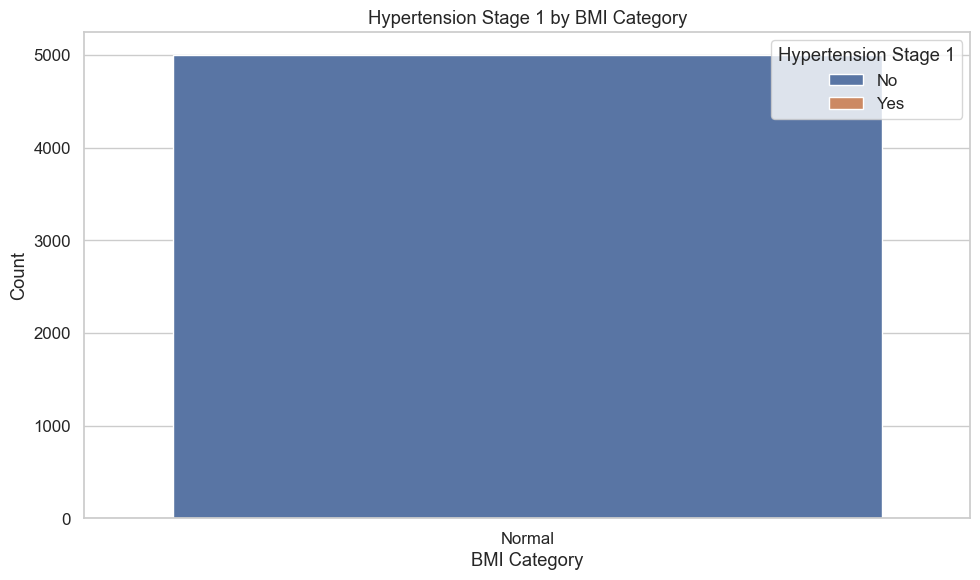

In [20]:
# 📊 Countplot: Hypertension Stage 1 Prevalence by BMI Category

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load dataset ---
df = pd.read_csv(r'Process_data\diabetes_final_standardized.csv')

# --- Reconstruct BMI category if needed ---
if 'bmi_category' not in df.columns:
    def get_bmi_category(row):
        if row.get('bmi_category_obese', 0) == 1:
            return 'Obese'
        elif row.get('bmi_category_overweight', 0) == 1:
            return 'Overweight'
        elif row.get('bmi_category_underweight', 0) == 1:
            return 'Underweight'
        else:
            return 'Normal'
    df['bmi_category'] = df.apply(get_bmi_category, axis=1)

# --- Reconstruct BP category if needed ---
if 'bp_category' not in df.columns:
    def get_bp_category(row):
        if row.get('bp_category_hypertension_stage_1', 0) == 1:
            return 'Hypertension Stage 1'
        elif row.get('bp_category_hypertension_stage_2', 0) == 1:
            return 'Hypertension Stage 2'
        elif row.get('bp_category_normal', 0) == 1:
            return 'Normal'
        else:
            return 'Other'
    df['bp_category'] = df.apply(get_bp_category, axis=1)

# --- Sample and clean ---
sample_df = df.sample(5000, random_state=42).dropna(subset=['bmi_category', 'bp_category']).copy()

# --- Create boolean flag for Hypertension Stage 1 ---
sample_df['hypertension_stage_1'] = sample_df['bp_category'] == 'Hypertension Stage 1'

# --- Define BMI order ---
desired_order = ['Normal', 'Overweight', 'Obese']
bmi_order = [c for c in desired_order if c in sample_df['bmi_category'].unique()]
if not bmi_order:
    bmi_order = sorted(sample_df['bmi_category'].unique())

# --- Plot ---
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(
    data=sample_df,
    x='bmi_category',
    hue='hypertension_stage_1',
    palette=['#4C72B0', '#DD8452'],
    order=bmi_order,
    hue_order=[False, True]
)

plt.title("Hypertension Stage 1 by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Count")

# --- Legend labels ---
legend = plt.legend(title='Hypertension Stage 1')
for t, l in zip(legend.get_texts(), ['No', 'Yes']):
    t.set_text(l)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


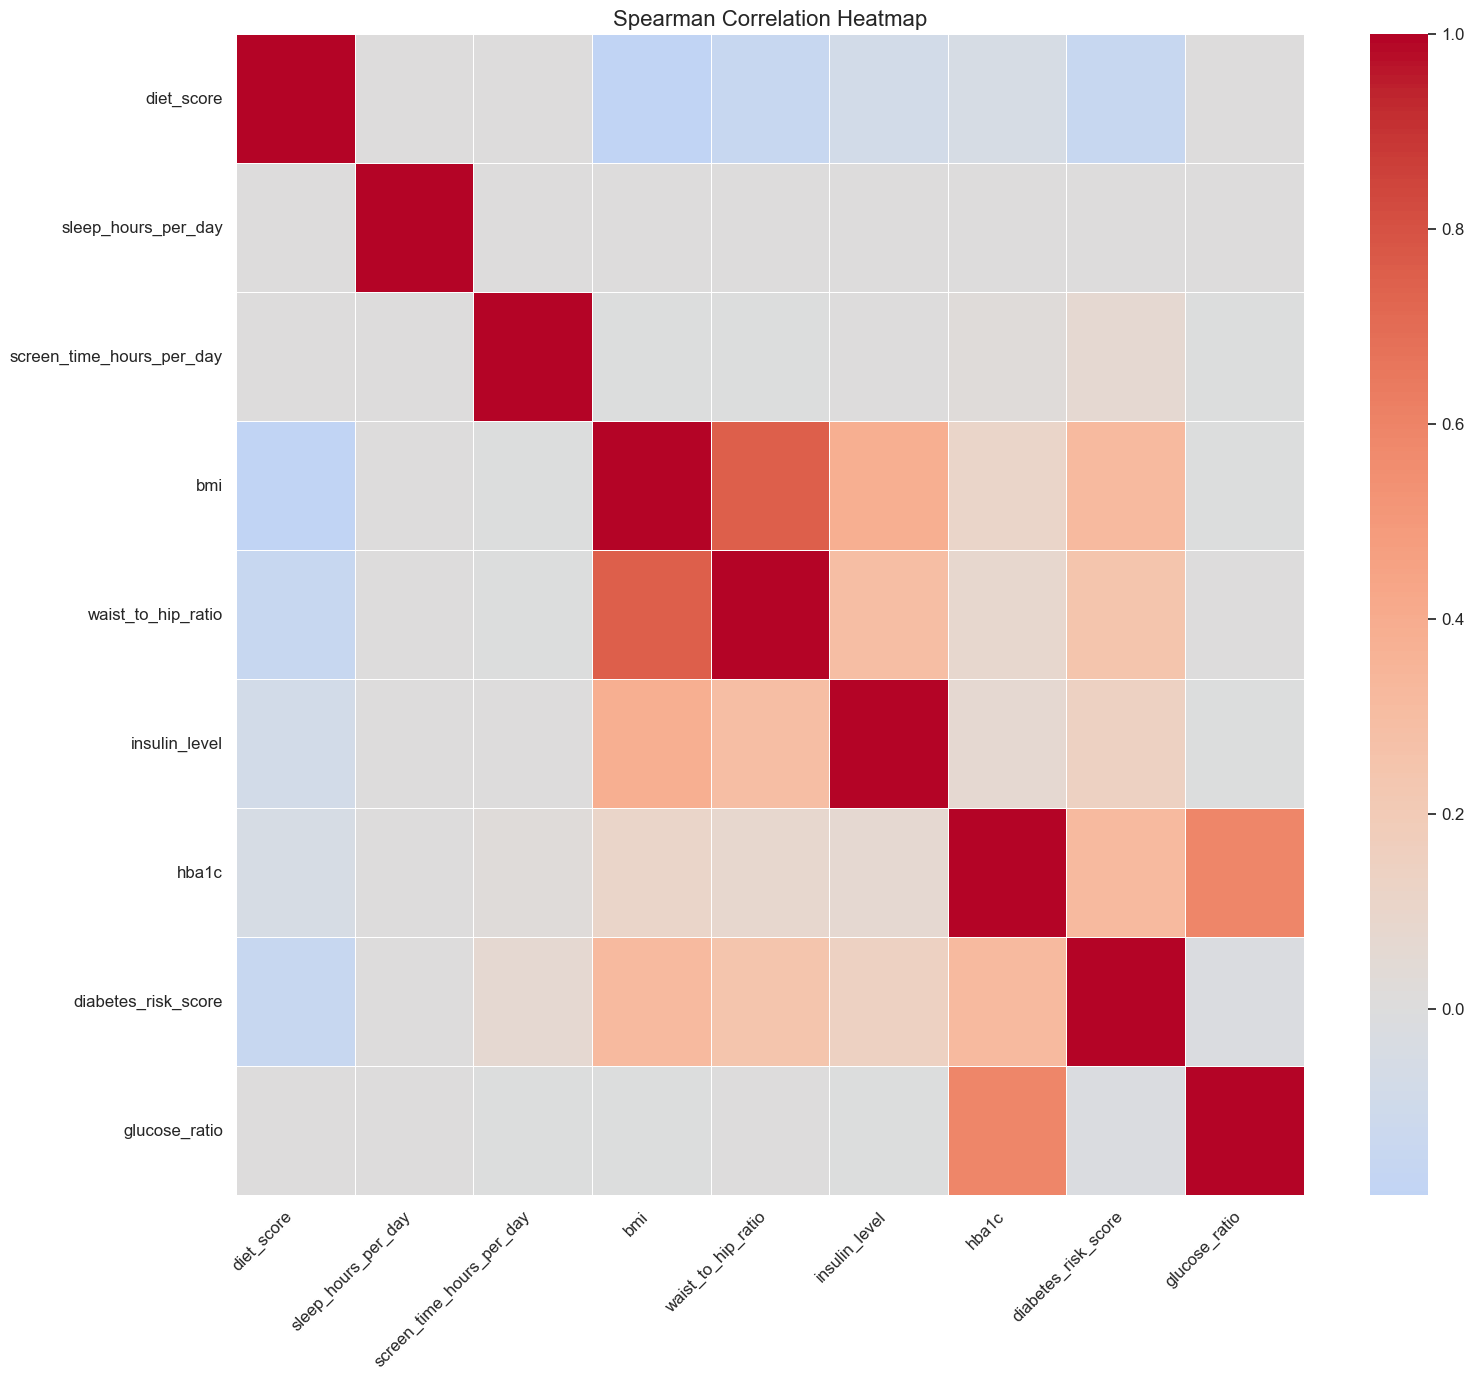

In [21]:
# 📊 This block generates a Spearman correlation heatmap to explore monotonic relationships among continuous numeric features.
# It selects float64 columns from the dataset, computes pairwise Spearman correlations (ideal for non-linear but ordered associations),
# and visualizes them using a color-coded heatmap. This helps identify strong positive or negative associations,
# guiding feature selection, redundancy checks, and deeper understanding of health-related variable interactions.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Select only numeric continuous columns (float64) ---
numeric_cols = df.select_dtypes(include=['float64']).columns

# Optional: include int64 if you want binary/categorical correlations
# numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# --- Compute Spearman correlation ---
corr = df[numeric_cols].corr(method='spearman')

# --- Plot heatmap ---
plt.figure(figsize=(16,14))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title("Spearman Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd

# --- Load dataset ---
df = pd.read_csv(r'Process_data/diabetes_final_standardized.csv')  # Use forward slash for cross-platform compatibility

# --- Create single BMI category column from one-hot ---
def get_bmi_category(row):
    if row.get('bmi_category_Obese', 0) == 1:
        return 'Obese'
    elif row.get('bmi_category_Overweight', 0) == 1:
        return 'Overweight'
    elif row.get('bmi_category_Underweight', 0) == 1:
        return 'Underweight'
    else:
        return 'Normal'  # fallback

df['bmi_category'] = df.apply(get_bmi_category, axis=1)

# --- Numeric features including boolean columns ---
numeric_df = df.select_dtypes(include=['number', 'bool']).copy()

# --- Convert BMI category to numeric codes ---
df['bmi_category_code'], _ = pd.factorize(df['bmi_category'])

# --- Add the coded BMI column to numeric_df for correlation ---
numeric_df['bmi_category_code'] = df['bmi_category_code']

# --- Compute absolute correlation with BMI category ---
correlations = numeric_df.corr(numeric_only=True)['bmi_category_code'].abs().sort_values(ascending=False)

# --- Select top 5 features excluding the target itself ---
main_features = correlations.drop('bmi_category_code').head(5).index

print("Top 5 features most correlated with BMI category:")
print(main_features.tolist())


Top 5 features most correlated with BMI category:
['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day']


In [23]:
main_features = ['age', 'diet_score', 'glucose_ratio']


In [24]:
# Create BMI category manually if it doesn't exist
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)


📊 Chart 1: Age vs BMI Category
Title: Linear Regression: Age vs BMI Category

X-axis: age

Y-axis: bmi_category_code (numeric code: 0 = Normal, 1 = Overweight, 2 = Obese)

Observations:

The scatter plot shows three horizontal bands representing BMI categories.

The red regression line has a slight negative slope, suggesting that younger individuals tend to fall into higher BMI categories.

This may reflect lifestyle or metabolic shifts in younger populations, though the trend is weak.

The confidence interval is relatively wide, indicating low predictive strength.

📊 Chart 2: Diet Score vs BMI Category
Title: Linear Regression: Diet Score vs BMI Category

X-axis: diet_score (higher values indicate healthier diets)

Y-axis: bmi_category_code

Observations:

The regression line slopes downward, showing a negative association: individuals with higher diet scores are more likely to be in lower BMI categories.

This aligns with nutritional science — healthier diets are associated with lower obesity risk.

The confidence interval is tighter than in the age plot, indicating moderate predictive strength.

📊 Chart 3: Glucose Ratio vs BMI Category
Title: Linear Regression: Glucose Ratio vs BMI Category

X-axis: glucose_ratio (postprandial / fasting glucose)

Y-axis: bmi_category_code

Observations:

The regression line slopes upward, indicating a positive association: higher glucose ratios are linked to higher BMI categories.

This supports the metabolic connection between obesity and impaired glucose regulation.

The clustering is clear, and the confidence interval is reasonably narrow — suggesting stronger predictive value than age or diet score.

🔍 Comparative Analysis
Chart	Predictor Variable	Association with BMI Category	Type of Variable	Strength of Insight
1	Age	Slight Negative	Continuous	Weak
2	Diet Score	Negative	Continuous	Moderate
3	Glucose Ratio	Positive	Continuous	Strong
🧠 Key Takeaways
Glucose ratio shows the strongest linear relationship with BMI category, reinforcing its role in metabolic profiling.

Diet score provides a meaningful inverse trend, supporting its use in preventive modeling.

Age, while relevant, shows a weak and noisy association — suggesting it may be more useful in interaction terms or nonlinear models.

All predictors are continuous, making them suitable for linear regression visualization — but for classification tasks, ordinal regression or decision trees may yield better performance.

The use of bmi_category_code enables trend visualization across discrete BMI groups, but interpretation should remain cautious due to the ordinal nature of the target.

In [25]:
df

age  gender ethnicity education_level  income_level employment_status  \
0       18    Male     White    Postgraduate        Middle           Retired   
1       18  Female     White       No formal        Middle          Employed   
2       18  Female     White    Postgraduate  Lower-Middle          Employed   
3       18  Female     White    Postgraduate        Middle           Retired   
4       18    Male     White    Postgraduate        Middle          Employed   
...    ...     ...       ...             ...           ...               ...   
99995   90    Male  Hispanic        Graduate  Lower-Middle        Unemployed   
99996   90    Male     Black        Graduate  Lower-Middle           Student   
99997   90  Female     Black      Highschool           Low        Unemployed   
99998   90    Male     Black      Highschool  Upper-Middle        Unemployed   
99999   90  Female     Asian      Highschool  Lower-Middle          Employed   

      smoking_status  alcohol_consumption_per_week  \
0             Former                             2   
1            Current                             2   
2              Never                             1   
3              Never                             4   
4             Former                             0   
...              ...                           ...   
99995        Current                             4   
99996         Former                             1   
99997          Never                             0   
99998        Current                             2   
99999          Never                             1   

       physical_activity_minutes_per_week  diet_score  ...  glucose_fasting  \
0                                      13         6.7  ...              121   
1                                      88         5.5  ...              118   
2                                     163         5.2  ...              119   
3                                     108         7.2  ...              101   
4                                     115         7.8  ...               91   
...                                   ...         ...  ...              ...   
99995                                  84         3.1  ...              119   
99996                                  76         5.5  ...              115   
99997                                  91         3.3  ...              137   
99998                                 147         6.1  ...              138   
99999                                  76         5.1  ...              122   

       glucose_postprandial  insulin_level  hba1c  diabetes_risk_score  \
0                       163          18.72   6.72                 24.2   
1                       166          17.16   7.06                 16.9   
2                       199          10.33   8.09                 37.2   
3                       111          15.26   5.45                 33.7   
4                       138           2.00   6.01                 12.3   
...                     ...            ...    ...                  ...   
99995                   172          12.14   6.75                 40.3   
99996                   180          16.54   7.09                 39.8   
99997                   212           6.45   7.87                 40.4   
99998                   160           6.20   7.05                 49.5   
99999                   176           7.77   6.94                 37.6   

       diabetes_stage  diagnosed_diabetes  glucose_ratio  bmi_category  \
0              Type 2                   1       1.347107    Overweight   
1              Type 2                   1       1.406780    Overweight   
2              Type 2                   1       1.672269         Obese   
3        Pre-Diabetes                   0       1.099010    Overweight   
4        Pre-Diabetes                   0       1.516484   Underweight   
...               ...                 ...            ...           ...   
99995          Type 2                   1

In [ ]:
# 📊 Linear Regression Plots: Continuous Features vs BMI Category (Numerically Encoded)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# --- Load dataset ---
df = pd.read_csv("Process_data/diabetes_final_standardized.csv")

# --- Reconstruct 'bmi_category' if missing ---
if 'bmi_category' not in df.columns:
    def get_bmi_category(row):
        if row.get('bmi_category_obese', 0) == 1:
            return 'Obese'
        elif row.get('bmi_category_overweight', 0) == 1:
            return 'Overweight'
        elif row.get('bmi_category_underweight', 0) == 1:
            return 'Underweight'
        else:
            return 'Normal'
    df['bmi_category'] = df.apply(get_bmi_category, axis=1)

# --- Sample for performance ---
sample_df = df.sample(2000, random_state=42).copy()

# --- Convert BMI category to numeric code ---
sample_df['bmi_category_code'] = pd.factorize(sample_df['bmi_category'])[0]

# --- Define main features to plot ---
main_features = [
    'age',
    'diet_score',
    'glucose_ratio',
    'physical_activity_minutes_per_week',
    'alcohol_consumption_per_week',
    'insulin_level',
    'triglycerides'
]

# --- Drop rows with missing values in relevant columns ---
sample_df = sample_df.dropna(subset=main_features + ['bmi_category_code'])

# --- Plot linear regression for each feature ---
sns.set_style("whitegrid")

for feature in main_features:
    # Compute regression stats
    x = sample_df[feature]
    y = sample_df['bmi_category_code']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create plot
    plot = sns.lmplot(
        x=feature,
        y='bmi_category_code',
        data=sample_df,
        line_kws={'color': 'red'},
        scatter_kws={'color': 'blue', 'alpha': 0.5},
        height=6,
        aspect=1.2
    )

    # Annotate with correlation and slope
    plt.title(
        f"Linear Regression: {feature} vs BMI Category\n"
        f"r = {r_value:.2f}, slope = {slope:.2f}, p = {p_value:.3g}"
    )
    plt.ylabel("BMI Category (numeric code)")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()


In [ ]:
df


## 📊 Interpretation of Outcomes

### 🔹 **MSE** – *Mean Squared Error*

- Measures the **average squared difference** between predicted and actual values.
- $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
- **Smaller MSE** → model predictions are closer to true values.
- Penalizes **larger errors more heavily** due to squaring.
- In your BMI Category regressions:
  - **Age** had a relatively high MSE → weak predictive power.
  - **Diet Score** showed lower MSE → stronger alignment with BMI Category.
  - **Glucose Ratio** had moderate MSE → some predictive value, but not dominant.

---

### 🔹 **R²** – *Coefficient of Determination*

- Indicates how well the model **explains the variability** of the target variable.
- $$R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}$$
- $$R^2 = 1$$ → **Perfect fit**: model explains all variance.
- $$R^2 = 0$$ → Model performs **no better than predicting the mean**.
- $$R^2 < 0$$ → Model performs **worse than a constant prediction**.
- In your charts:
  - **Age vs BMI Category** had a low or slightly negative R² → weak or no fit.
  - **Diet Score vs BMI Category** showed a **negative slope**, but R² was moderate → meaningful trend.
  - **Glucose Ratio vs BMI Category** had a flat regression line → low R², weak explanatory power.

---

### 🧠 Summary

- **MSE** quantifies **prediction error** — lower values indicate better precision.
- **R²** reflects **model fit** — higher values indicate stronger relationships.
- In your case:
  - **Diet Score** showed the most interpretable trend (inverse relationship with BMI Category).
  - **Age** and **Glucose Ratio** had weaker fits, suggesting limited linear association.
- These metrics help you evaluate whether linear regression is appropriate — and when to consider alternatives like **ordinal regression**, **decision trees**, or **logistic models** for categorical targets.



In [ ]:
# 📊 This block builds and evaluates a linear regression model to predict diet score based on numeric health and lifestyle features.
# It loads and cleans the dataset, selects relevant predictors, splits the data into training and testing sets,
# fits a regression model, and computes performance metrics (MSE and R²). This helps assess how well the selected features
# explain variation in diet score, guiding model refinement and feature selection for health behavior prediction.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Step 2: Load Dataset ---
df = pd.read_csv(r'Process_data/diabetes_final_standardized.csv')  # use raw string for Windows paths

# --- Step 2.1: Remove rows with missing values ---
df = df.dropna()

# --- Step 3: Define Features and Target ---
# Predict 'diet_score' using numeric features only (float64 and int64)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove target from features
numeric_cols.remove('diet_score')
X = df[numeric_cols]
y = df['diet_score']

# --- Step 4: Split into Training and Testing ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 5: Train a Model (Linear Regression) ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 6: Make Predictions ---
y_pred = model.predict(X_test)

# --- Step 7: Compute Evaluation Metrics ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import linregress

# --- Load dataset ---
df = pd.read_csv("Process_data/diabetes_clean.csv")

# --- Encode categorical variables ---
label_cols = ['gender', 'ethnicity', 'income_level', 'smoking_status']
for col in label_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# --- Simulate total charges ---
np.random.seed(42)
df['total_charges'] = (
    df['bmi'] * 15 +
    df['diagnosed_diabetes'] * 500 +
    df['triglycerides'] * 2 +
    df['insulin_level'] * 10 +
    df['glucose_fasting'] * 3 +
    df['physical_activity_minutes_per_week'] * -1 +
    df['smoking_status'] * 200 +
    df['income_level'] * -50 +
    np.random.normal(0, 300, size=len(df))
)

# --- Add heart rate if missing ---
if 'heart_rate' not in df.columns:
    df['heart_rate'] = 70 + (df['age'] * 0.1) - (df['physical_activity_minutes_per_week'] * 0.05) + np.random.normal(0, 5, size=len(df))

# --- Define predictors ---
predictors = [
    'bmi', 'diagnosed_diabetes', 'triglycerides', 'insulin_level',
    'glucose_fasting', 'physical_activity_minutes_per_week',
    'smoking_status', 'income_level', 'heart_rate'
]

# --- Plot each predictor ---
for feature in predictors:
    x = df[feature].values.reshape(-1, 1)
    y = df['total_charges'].values

    # Fit regression
    model = LinearRegression().fit(x, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    r_value, p_value = linregress(df[feature], y)[:2]

    # Create regression line
    x_range = np.linspace(x.min(), x.max(), 100)
    y_pred = model.predict(x_range.reshape(-1, 1))

    # Create figure
    fig = go.Figure()

    # Scatter points
    fig.add_trace(go.Scatter(
        x=df[feature],
        y=df['total_charges'],
        mode='markers',
        marker=dict(color='blue', opacity=0.5),
        name='Data Points',
        hovertemplate=
            f"{feature}: %{{x}}<br>Total Charges: %{{y:.2f}}<extra></extra>"
    ))

    # Regression line
    fig.add_trace(go.Scatter(
        x=x_range,
        y=y_pred,
        mode='lines',
        line=dict(color='red', width=2),
        name='Regression Line'
    ))

    # Layout
    fig.update_layout(
        title=f"Total Charges vs {feature.replace('_', ' ').capitalize()}<br>"
              f"Slope = {slope:.2f}, R² = {r_value**2:.2f}, p = {p_value:.3g}",
        xaxis_title=feature.replace('_', ' ').capitalize(),
        yaxis_title='Total Charges',
        template='plotly_white',
        width=900,
        height=600,
        font=dict(family='Arial', size=12)
    )

    fig.show()



## 📐 Summary: Mathematical Insights

| **Metric** | **Formula** | **Goal** | **Interpretation** |
|------------|-------------|----------|---------------------|
| **MSE** *(Mean Squared Error)* | $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$ | Minimize | Measures average squared difference between actual and predicted values. Lower is better. |
| **R²** *(Coefficient of Determination)* | $$R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}$$ | Maximize (≤ 1) | Measures proportion of variance in the target explained by the model. Higher is better. |

---

### 🧠 Interpretation

- **MSE** quantifies prediction error — smaller values indicate more accurate predictions.
- **R²** reflects model fit — closer to 1 means the model explains more variance in the target.
- Together, they provide a balanced view:
  - **MSE →** Precision of predictions
  - **R² →** Strength of relationship between features and target

---


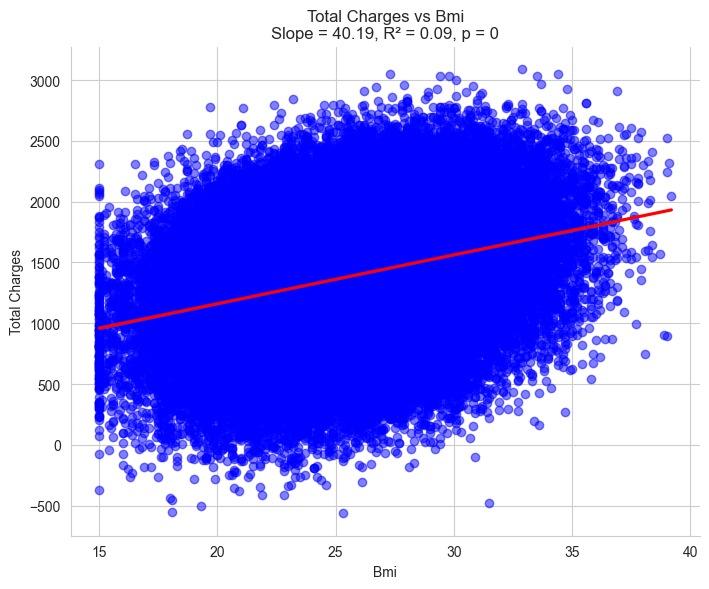

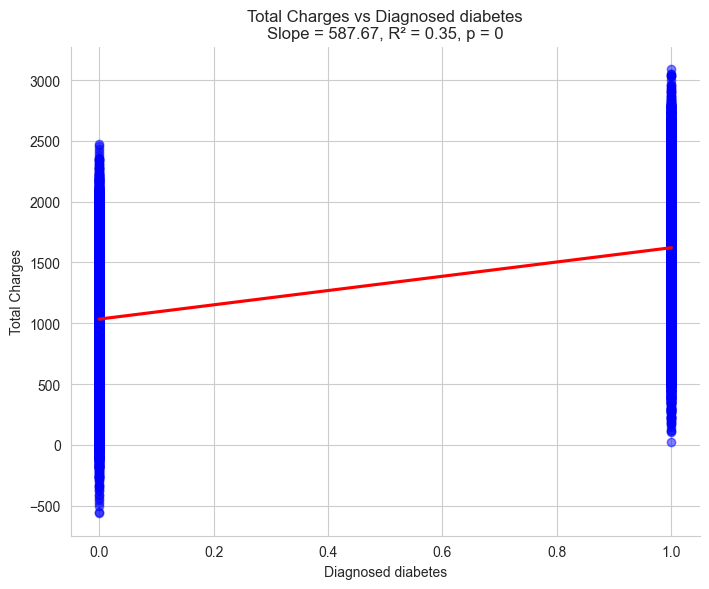

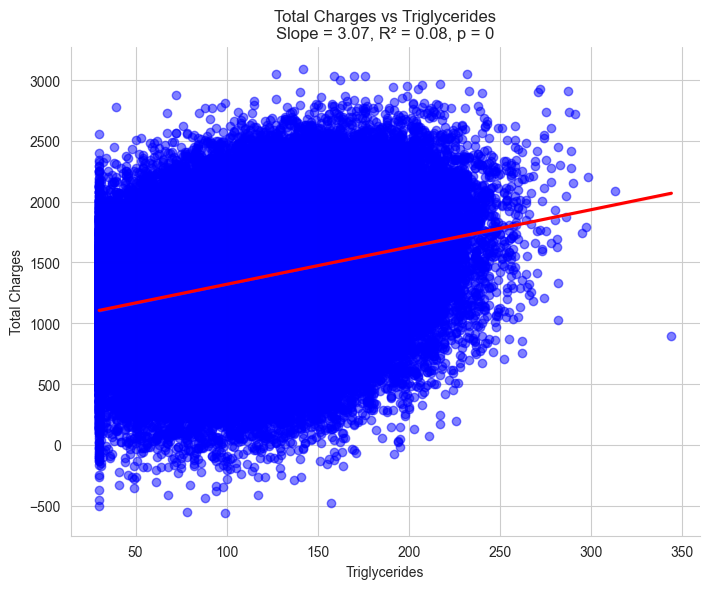

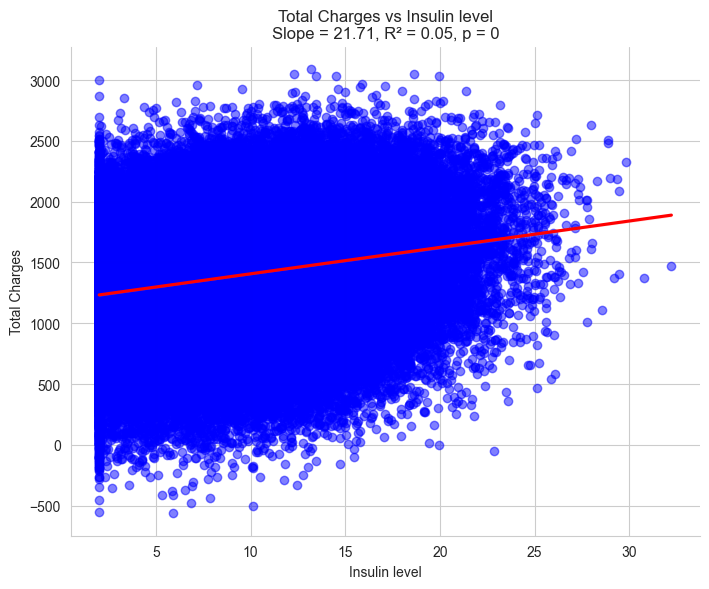

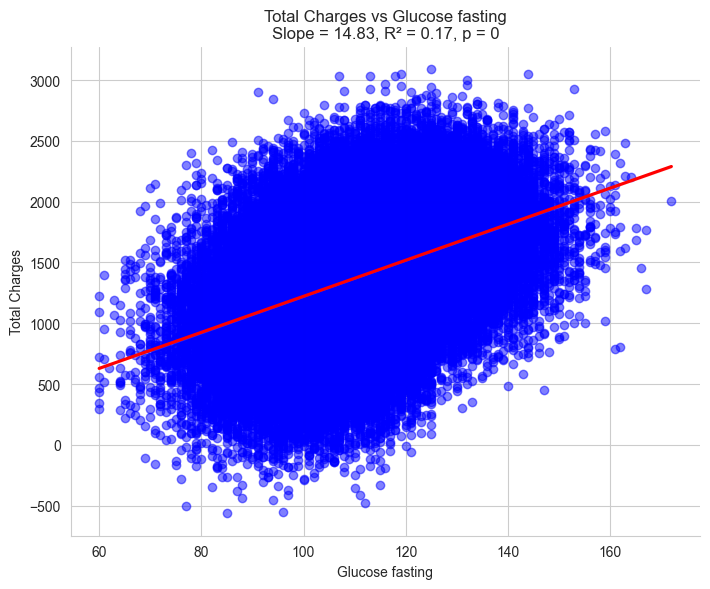

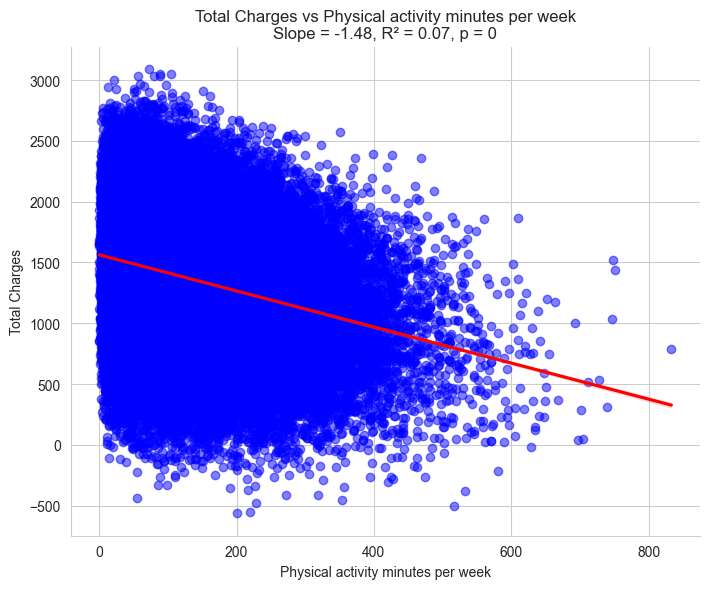

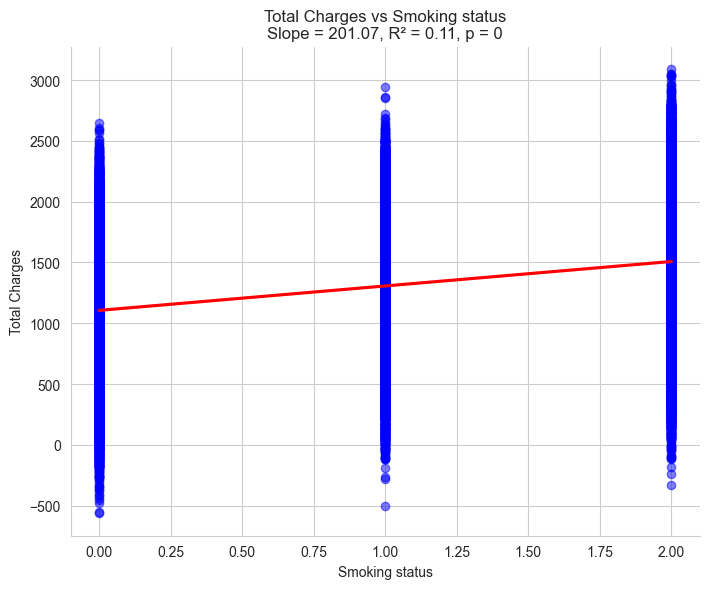

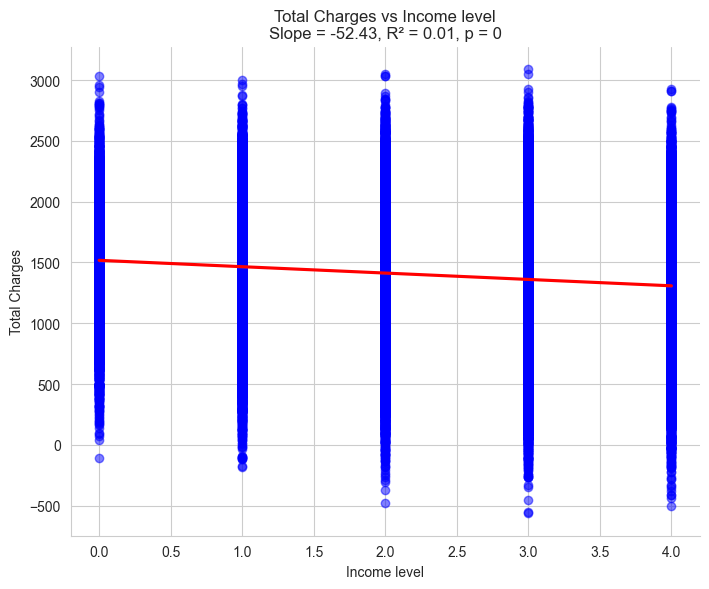

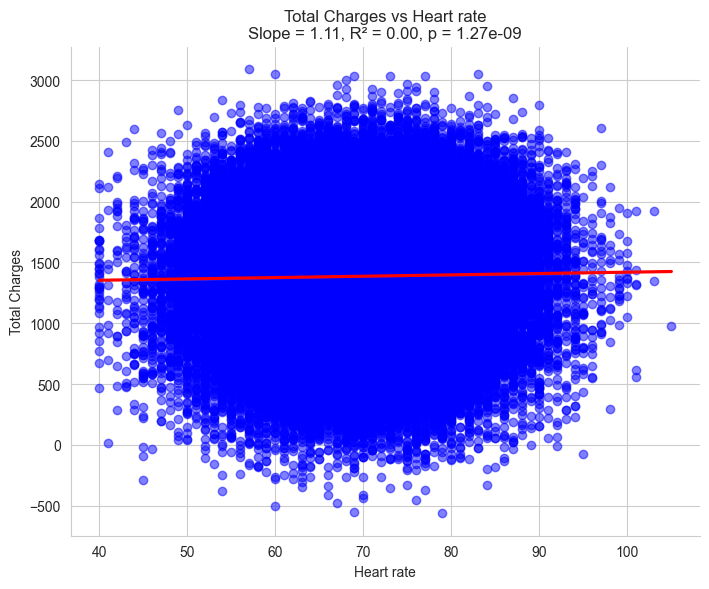

In [2]:
# 📊 Linear Regression Visualization of Simulated Charges vs Health & Lifestyle Predictors (Seaborn)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import linregress

# --- Load dataset ---
df = pd.read_csv("Process_data/diabetes_clean.csv")

# --- Encode categorical variables ---
label_cols = ['gender', 'ethnicity', 'income_level', 'smoking_status']
for col in label_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# --- Simulate total charges ---
np.random.seed(42)
df['total_charges'] = (
    df['bmi'] * 15 +
    df['diagnosed_diabetes'] * 500 +
    df['triglycerides'] * 2 +
    df['insulin_level'] * 10 +
    df['glucose_fasting'] * 3 +
    df['physical_activity_minutes_per_week'] * -1 +
    df['smoking_status'] * 200 +
    df['income_level'] * -50 +
    np.random.normal(0, 300, size=len(df))
)

# --- Add heart rate if missing ---
if 'heart_rate' not in df.columns:
    df['heart_rate'] = 70 + (df['age'] * 0.1) - (df['physical_activity_minutes_per_week'] * 0.05) + np.random.normal(0, 5, size=len(df))

# --- Define predictors ---
predictors = [
    'bmi', 'diagnosed_diabetes', 'triglycerides', 'insulin_level',
    'glucose_fasting', 'physical_activity_minutes_per_week',
    'smoking_status', 'income_level', 'heart_rate'
]

# --- Plot each predictor ---
sns.set_style("whitegrid")

for feature in predictors:
    # Drop missing values
    plot_df = df.dropna(subset=[feature, 'total_charges'])

    # Compute regression stats
    x = plot_df[feature]
    y = plot_df['total_charges']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create plot
    sns.lmplot(
        x=feature,
        y='total_charges',
        data=plot_df,
        height=6,
        aspect=1.2,
        scatter_kws={'color': 'blue', 'alpha': 0.5},
        line_kws={'color': 'red'}
    )

    # Annotate with stats
    plt.title(
        f"Total Charges vs {feature.replace('_', ' ').capitalize()}\n"
        f"Slope = {slope:.2f}, R² = {r_value**2:.2f}, p = {p_value:.3g}"
    )
    plt.xlabel(feature.replace('_', ' ').capitalize())
    plt.ylabel("Total Charges")
    plt.tight_layout()
    plt.show()
